# Exploratory Data Analysis (EDA)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('../input/nslkdd/KDDTrain+.txt')


In [4]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns
# sanity check
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
data = data.drop('level', axis=1)

In [7]:
data.shape

(125972, 42)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

### Data types: float64 (15 columns), int(23), object (4 columns)


In [9]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [10]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing Data


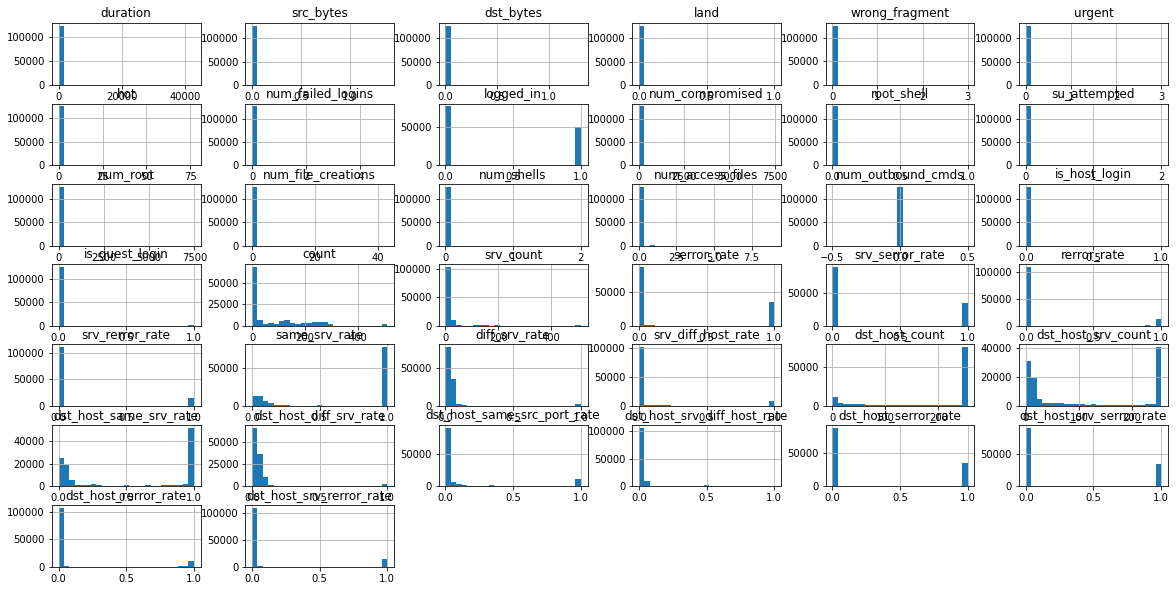

In [11]:
data.hist(bins=25,figsize=(20,10));

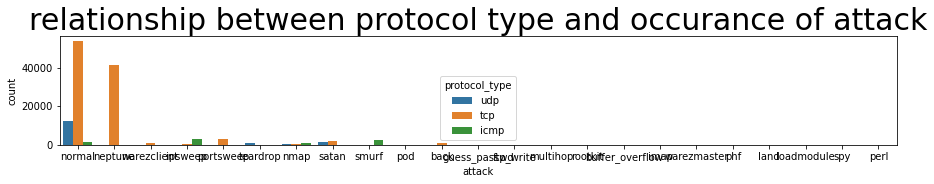

In [12]:
plt.figure(figsize=(15,2))
sns.countplot(x='attack',data=data,hue='protocol_type')
plt.title('relationship between protocol type and occurance of attack',fontdict={'fontsize':30})
plt.show()

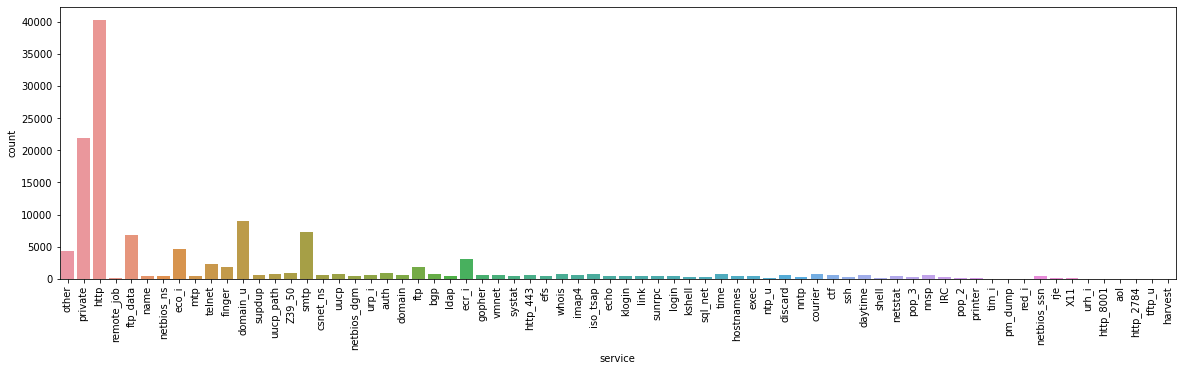

In [13]:
plt.figure(figsize=(20,5))
t = sns.countplot(x='service', data = data)
t.set_xticklabels(t.get_xticklabels(),rotation=90);

### http is the most website service used

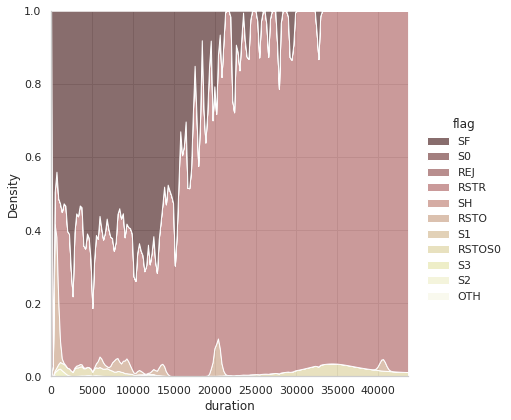

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Change the color palette
custom_palette = "pink" 

sns.set_theme(style="whitegrid")

sns.displot(
    data=data,
    x="duration", hue="flag",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette=custom_palette,
)

plt.show()


In [15]:
data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [16]:
data["attack"] = np.where(data["attack"] != "normal", 'malicious','normal')


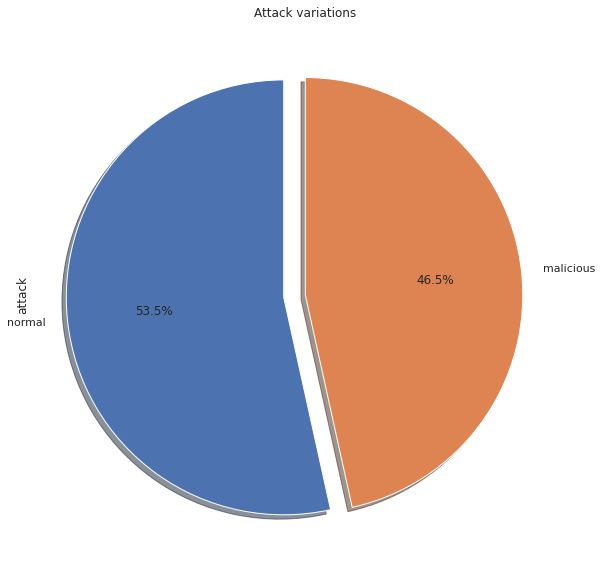

In [17]:
plt.figure(figsize = (10,10))
r = data.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack variations')
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [19]:
corr_matrix=data.corr()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,0.050570,-0.109777,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,0.041056,-0.045241,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.012250,-0.051865,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.401087,0.624363,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.010928,-0.010322,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219


<AxesSubplot:>

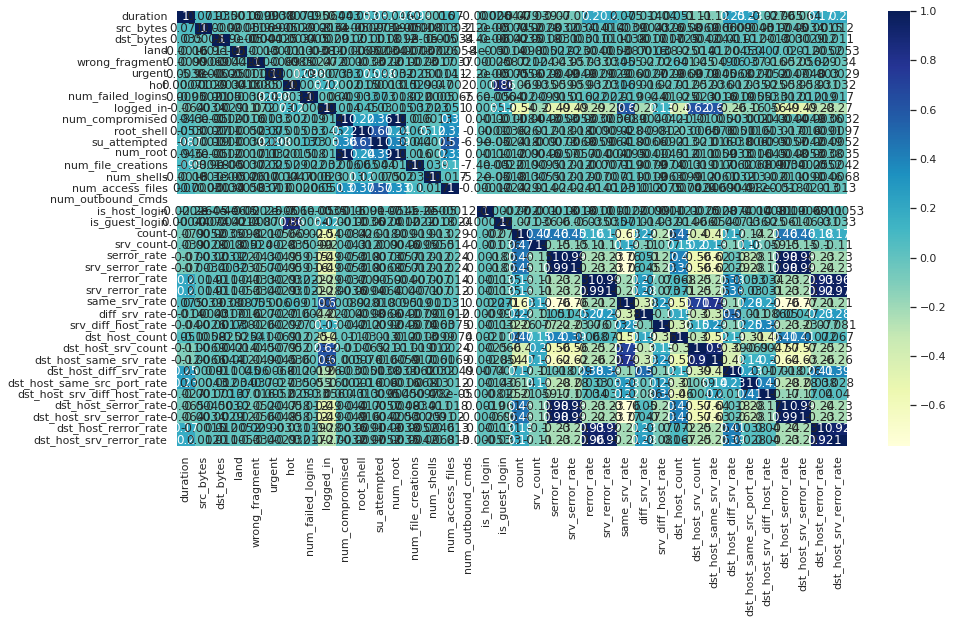

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

**Data cleaning**

In [21]:
# data = data[data.duration != 0]     ## First way: NO!

In [22]:
print(data['duration'].quantile(0.50)) 
print(data['duration'].quantile(0.97)) 

## We searched for quantile ranges and we will replace later.

0.0
31.0


In [23]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,malicious
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,malicious
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,malicious


## Missing data:


In [24]:
print(data.isnull().values.any())

False


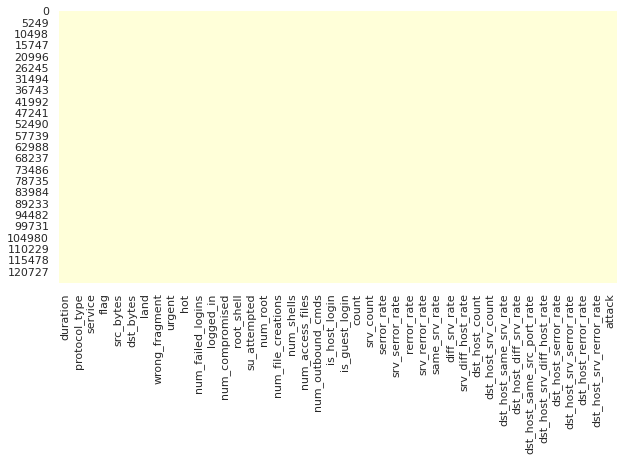

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Choose a different color map (cmap)
custom_cmap = "YlGnBu"  

sns.heatmap(data.isnull(), cmap=custom_cmap, cbar=False)

plt.show()


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

## Encoding categorical columns:

In [27]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])
data['attack']=le.fit_transform(data['attack'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int64  
 2   service                      125972 non-null  int64  
 3   flag                         125972 non-null  int64  
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

###  data are numerical.

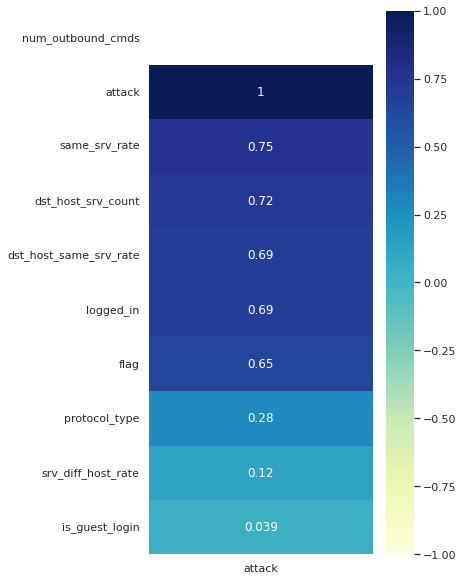

In [29]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(data.corr()[['attack']].sort_values('attack').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

****# Outliers:


### ______________________________________________

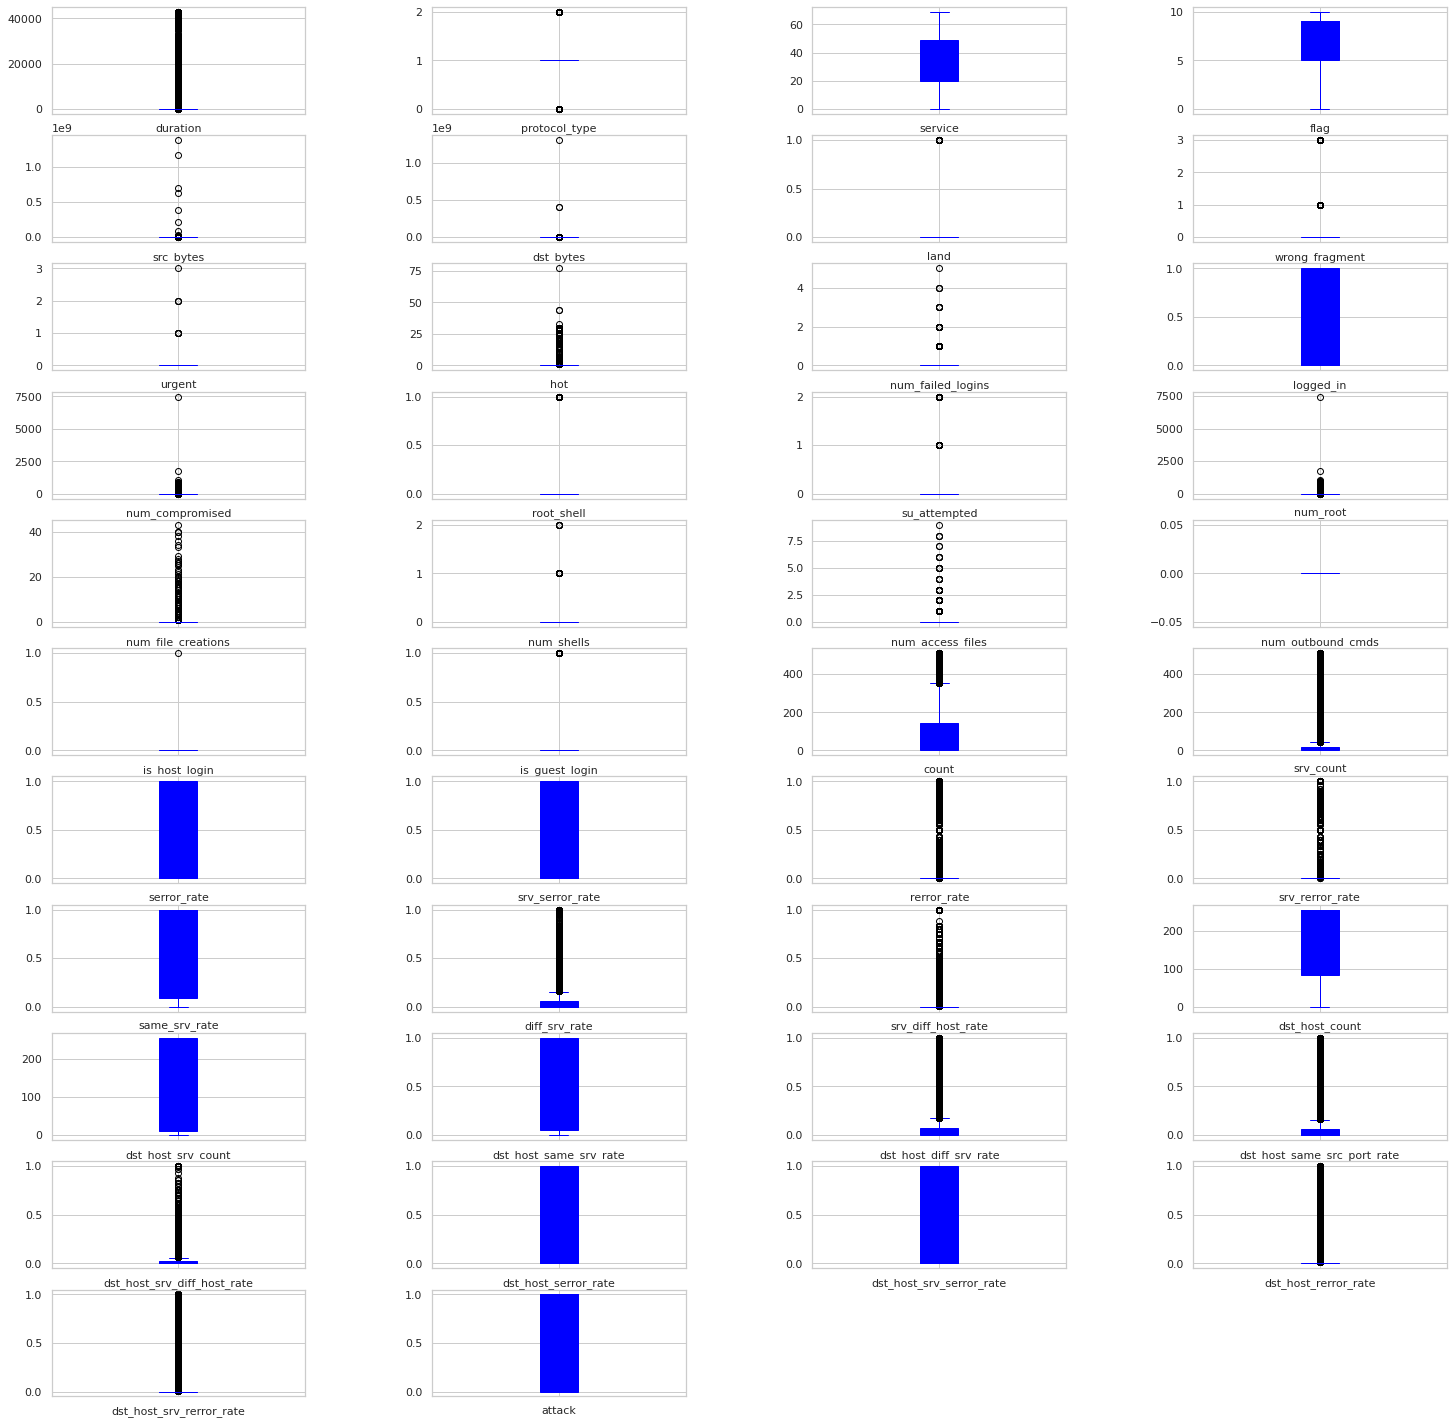

In [30]:
nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "blue")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

In [31]:
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,0.534579
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,0.498805
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1) Deletion of outliers:

In [32]:
data = data.drop(data[data['dst_bytes']>1500].index)
data = data.drop(data[data['src_bytes']>750].index)
print(data['duration'].quantile(0.10)) 
print(data['duration'].quantile(0.97)) 
data['duration'] = np.where(data['duration'] > 31, 0, data['duration'])   

0.0
43.33999999999651


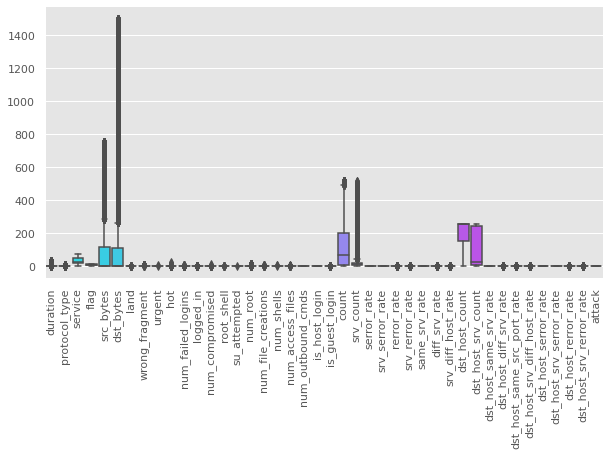

In [33]:
plt.figure(figsize = (10,5))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

## VIF:

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

duration                         1.813811
protocol_type                   16.173738
service                          6.552518
flag                            50.397607
src_bytes                        4.493139
dst_bytes                        3.366866
land                             1.025910
wrong_fragment                   1.395067
urgent                           1.001292
hot                              6.891732
num_failed_logins                1.028334
logged_in                        7.150341
num_compromised                  1.027400
root_shell                       1.148496
su_attempted                     1.000332
num_root                         1.134752
num_file_creations               1.368472
num_shells                       1.489801
num_access_files                 1.006864
num_outbound_cmds                     NaN
is_host_login                         NaN
is_guest_login                   7.410921
count                            6.439066
srv_count                        3

## Treatment of multicolinearity:

In [35]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [36]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

srv_serror_rate has been removed
dst_host_serror_rate has been removed
srv_rerror_rate has been removed
dst_host_srv_serror_rate has been removed
flag has been removed
rerror_rate has been removed
dst_host_same_srv_rate has been removed
same_srv_rate has been removed
protocol_type has been removed
dst_host_rerror_rate has been removed


,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,attack
0,0,44,146,0,0,0,0,0,0,0,...,0.0,0.15,0.00,255,1,0.60,0.88,0.0,0.0,1
1,0,49,0,0,0,0,0,0,0,0,...,1.0,0.07,0.00,255,26,0.05,0.00,0.0,0.0,0
3,0,24,199,420,0,0,0,0,0,1,...,0.0,0.00,0.09,255,255,0.00,0.00,0.0,0.0,1
4,0,49,0,0,0,0,0,0,0,0,...,0.0,0.06,0.00,255,19,0.07,0.00,0.0,1.0,0
5,0,49,0,0,0,0,0,0,0,0,...,1.0,0.06,0.00,255,9,0.05,0.00,0.0,0.0,0


### calculating VIF for remaining columns

In [37]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(duration                       1.791046
 service                        5.881602
 src_bytes                      4.320312
 dst_bytes                      3.283219
 land                           1.009783
 wrong_fragment                 1.107757
 urgent                         1.001224
 hot                            6.836121
 num_failed_logins              1.017522
 logged_in                      6.214193
 num_compromised                1.025859
 root_shell                     1.148390
 su_attempted                   1.000323
 num_root                       1.124960
 num_file_creations             1.367713
 num_shells                     1.489313
 num_access_files               1.006712
 num_outbound_cmds                   NaN
 is_host_login                       NaN
 is_guest_login                 7.350108
 count                          4.570040
 srv_count                      3.021249
 serror_rate                    5.825774
 diff_srv_rate                  1.766309
 srv_diff_host_r

### Rearragning columns:
- No need as Attack is the last column

In [38]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.0,0.0,0.0,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.0,0.0,0.0,0
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.0,1.0,1.0,0
5,0,1,49,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125966,0,1,24,9,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.0,0.0,1
125967,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.0,0.0,0
125968,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.0,0.0,1
125970,0,1,30,5,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.0,0.0,0


## Splitting data

In [39]:
x = data.drop(['attack'] , axis = 1).values
y = data['attack'].values


In [40]:
y.sum()

38357

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)


In [42]:
x_train.shape

(74658, 41)

In [43]:
y_train.shape

(74658,)

# Scaling
### Make sure all data aren't categorical

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93323 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     93323 non-null  int64  
 1   protocol_type                93323 non-null  int64  
 2   service                      93323 non-null  int64  
 3   flag                         93323 non-null  int64  
 4   src_bytes                    93323 non-null  int64  
 5   dst_bytes                    93323 non-null  int64  
 6   land                         93323 non-null  int64  
 7   wrong_fragment               93323 non-null  int64  
 8   urgent                       93323 non-null  int64  
 9   hot                          93323 non-null  int64  
 10  num_failed_logins            93323 non-null  int64  
 11  logged_in                    93323 non-null  int64  
 12  num_compromised              93323 non-null  int64  
 13  root_shell     

In [45]:
from sklearn.preprocessing import RobustScaler

In [46]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [47]:
x_train

array([[ 0.        ,  0.        ,  0.96774194, ...,  0.01      ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.80645161, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        , -0.29032258, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.16129032, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.35483871, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
x_train.shape

(74658, 41)

In [49]:
y_train.shape

(74658,)

**KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.9963


In [55]:
y_pred = knn.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.9671896847700285
MAE : 0.007929279399946424
RMSE: 0.08904650133467583


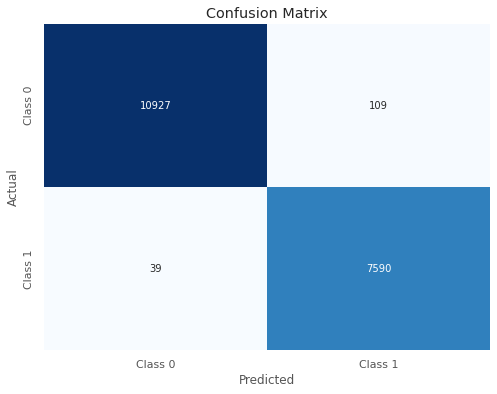

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_test and y_test are your test features and labels, respectively
y_pred = knn.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
classification_rep_knn = classification_report(y_test, y_pred)
print("Classification Report for KNN:\n", classification_rep_knn)


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.52      0.60      0.56        95
           1       0.58      0.50      0.54       105

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



### 2) Naive Bayes


In [58]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.8971


In [59]:
y_pred = naive.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.5581692009909917
MAE : 0.10677739083846773
RMSE: 0.32676809948106583


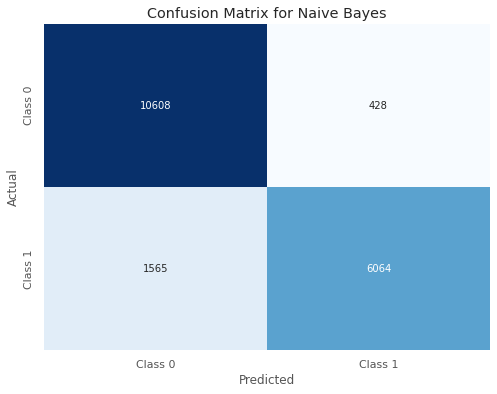

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     11036
           1       0.93      0.79      0.86      7629

    accuracy                           0.89     18665
   macro avg       0.90      0.88      0.89     18665
weighted avg       0.90      0.89      0.89     18665



In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_test and y_test are your test features and labels, respectively
y_pred_naive = naive.predict(x_test)

# Confusion Matrix
conf_matrix_naive = confusion_matrix(y_test, y_pred_naive)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_naive, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Classification Report
classification_rep_naive = classification_report(y_test, y_pred_naive)
print("Classification Report for Naive Bayes:\n", classification_rep_naive)


### 3) Random Forest Classification

In [61]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9988


In [62]:
y_pred = random.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.9689632153229999
MAE : 0.007500669702652022
RMSE: 0.08660640682219775


In [63]:
from sklearn.metrics import classification_report
predict=model.predict(x_test)
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11036
           1       0.95      0.97      0.96      7629

    accuracy                           0.97     18665
   macro avg       0.96      0.97      0.97     18665
weighted avg       0.97      0.97      0.97     18665



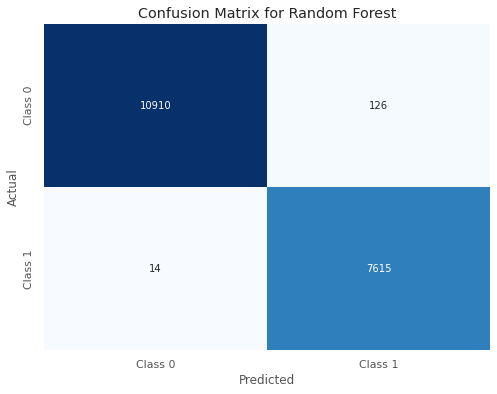

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_test and y_test are your test features and labels, respectively
y_pred_random = random.predict(x_test)

# Confusion Matrix
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

### 4) Decision Tree Clssification

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predict=model.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11036
           1       0.95      0.97      0.96      7629

    accuracy                           0.97     18665
   macro avg       0.96      0.97      0.97     18665
weighted avg       0.97      0.97      0.97     18665



In [66]:
y_pred = DT.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.946794083410857
MAE : 0.012858290918832038
RMSE: 0.11339440426596031


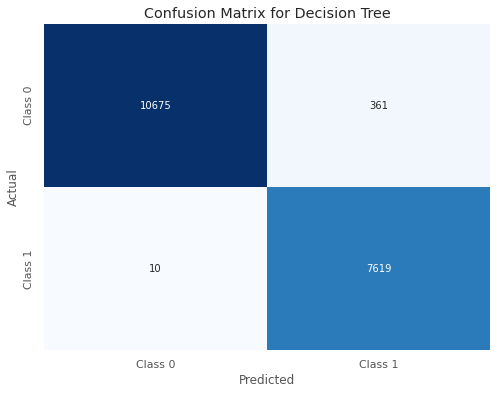

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     11036
           1       0.95      1.00      0.98      7629

    accuracy                           0.98     18665
   macro avg       0.98      0.98      0.98     18665
weighted avg       0.98      0.98      0.98     18665

R^2 :  0.9177525206059498
MAE : 0.01987677471202786
RMSE: 0.1409850159131383


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming x_train, x_test, y_train, and y_test are your training and test sets
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

# Make predictions
y_pred = DT.predict(x_test)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report
classification_rep_dt = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:\n", classification_rep_dt)

# Model Evaluation Metrics
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [72]:
import pandas as pd

# Create a dictionary with the metrics
data = {
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree'],
    'R^2': [0.9672, 0.5582, 0.9690, 0.9468],
    'MAE': [0.0079, 0.1068, 0.0075, 0.0129],
    'RMSE': [0.0890, 0.3268, 0.0866, 0.1134],
    'Precision (Class 0)': [0.52, 0.87, 0.98, 0.98],
    'Recall (Class 0)': [0.60, 0.96, 0.97, 0.97],
    'F1-Score (Class 0)': [0.56, 0.91, 0.97, 0.97],
    'Support (Class 0)': [95, 11036, 11036, 11036],
    'Precision (Class 1)': [0.58, 0.93, 0.95, 0.95],
    'Recall (Class 1)': [0.50, 0.79, 0.97, 0.97],
    'F1-Score (Class 1)': [0.54, 0.86, 0.96, 0.96],
    'Support (Class 1)': [105, 7629, 7629, 7629],
    'Accuracy': [0.55, 0.89, 0.97, 0.97]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

           Model     R^2     MAE    RMSE  Precision (Class 0)  \
0            KNN  0.9672  0.0079  0.0890                 0.52   
1    Naive Bayes  0.5582  0.1068  0.3268                 0.87   
2  Random Forest  0.9690  0.0075  0.0866                 0.98   
3  Decision Tree  0.9468  0.0129  0.1134                 0.98   

   Recall (Class 0)  F1-Score (Class 0)  Support (Class 0)  \
0              0.60                0.56                 95   
1              0.96                0.91              11036   
2              0.97                0.97              11036   
3              0.97                0.97              11036   

   Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  \
0                 0.58              0.50                0.54   
1                 0.93              0.79                0.86   
2                 0.95              0.97                0.96   
3                 0.95              0.97                0.96   

   Support (Class 1)  Accuracy  
0        

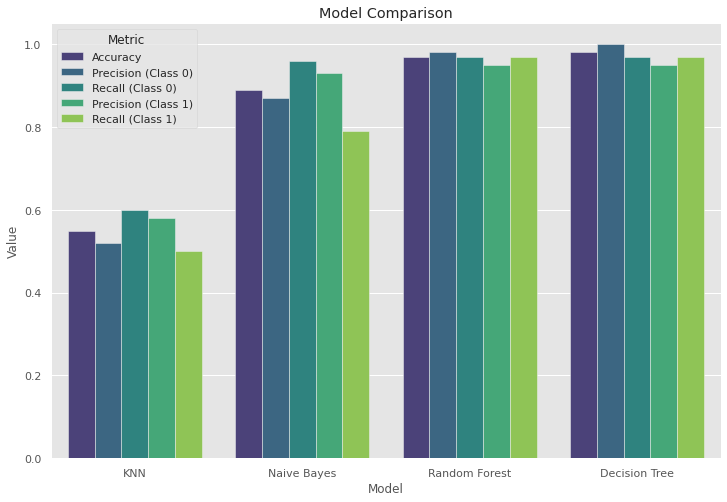

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for all models
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']
accuracy = [0.55, 0.89, 0.97, 0.98] 
precision_class0 = [0.52, 0.87, 0.98, 1.00]  
recall_class0 = [0.60, 0.96, 0.97, 0.97]  
precision_class1 = [0.58, 0.93, 0.95, 0.95]  
recall_class1 = [0.50, 0.79, 0.97, 0.97]  

# Create a DataFrame
import pandas as pd

data = {
    'Model': models,
    'Accuracy': accuracy,
    'Precision (Class 0)': precision_class0,
    'Recall (Class 0)': recall_class0,
    'Precision (Class 1)': precision_class1,
    'Recall (Class 1)': recall_class1,
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette='viridis')
plt.title('Model Comparison')
plt.show()


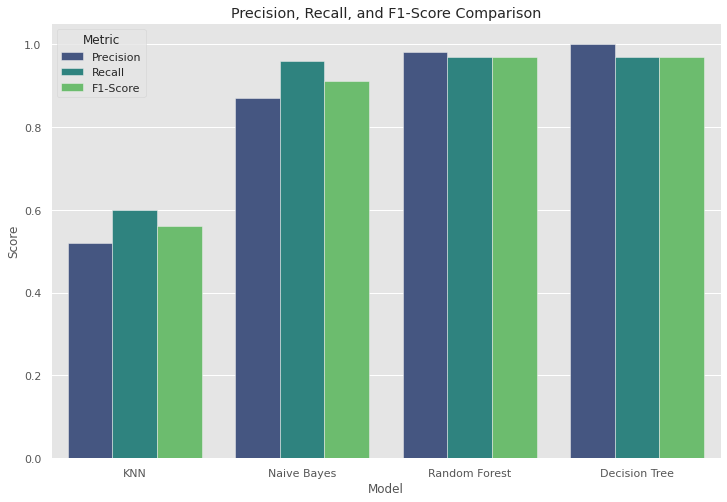

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for all models
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']
precision_class0 = [0.52, 0.87, 0.98, 1.00]  # Replace with the actual precision values for each model (Class 0)
recall_class0 = [0.60, 0.96, 0.97, 0.97]  # Replace with the actual recall values for each model (Class 0)
f1_score_class0 = [0.56, 0.91, 0.97, 0.97]  # Replace with the actual F1-Score values for each model (Class 0)
precision_class1 = [0.58, 0.93, 0.95, 0.95]  # Replace with the actual precision values for each model (Class 1)
recall_class1 = [0.50, 0.79, 0.97, 0.97]  # Replace with the actual recall values for each model (Class 1)
f1_score_class1 = [0.54, 0.86, 0.96, 0.96]  # Replace with the actual F1-Score values for each model (Class 1)

# Create a DataFrame
import pandas as pd

data = {
    'Model': models * 3,  # Repeat models for each metric
    'Metric': ['Precision'] * 4 + ['Recall'] * 4 + ['F1-Score'] * 4,
    'Class 0': precision_class0 + recall_class0 + f1_score_class0,
    'Class 1': precision_class1 + recall_class1 + f1_score_class1,
}

df = pd.DataFrame(data)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Class 0', hue='Metric', data=df, palette='viridis')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.show()
